In [6]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Sun Jul 30 09:51:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
!pwd

/content


In [11]:
import os

In [13]:
ROOT = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(ROOT)

In [14]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [15]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [16]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [17]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [20]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)

In [21]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
y = pd.DataFrame(housing.target, columns=housing.target_names)

In [23]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [24]:
X.shape

(20640, 8)

In [25]:
y.shape

(20640, 1)

In [29]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [31]:
X_train.shape

(11610, 8)

In [32]:
X_test.shape

(5160, 8)

In [34]:
X_valid.shape

(3870, 8)

In [35]:
X_train.shape[1:]

(8,)

In [36]:
LAYERS = [
    tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu", name="hiddenLayer1" ),
    tf.keras.layers.Dense(5, activation="relu", name="hiddenLayer2" ),
    tf.keras.layers.Dense(1)
]

In [37]:
model = tf.keras.models.Sequential(LAYERS)#model classifier..

In [38]:
# # For calculating accuracy score (r2 score)
# from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [39]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 hiddenLayer1 (Dense)        (None, 10)                310       
                                                                 
 hiddenLayer2 (Dense)        (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [41]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [42]:
EPOCHS = 10

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 7s 5ms/step - loss: 0.7156 - coeff_determination: 0.4406 - val_loss: 0.5739 - val_coeff_determination: 0.5116
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4400 - coeff_determination: 0.6535 - val_loss: 0.3983 - val_coeff_determination: 0.6771
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4034 - coeff_determination: 0.6815 - val_loss: 0.3823 - val_coeff_determination: 0.6923
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.3855 - coeff_determination: 0.6946 - val_loss: 0.3569 - val_coeff_determination: 0.7086
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3715 - coeff_determination: 0.7045 - val_loss: 0.3479 - val_coeff_determination: 0.7124
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3631 - coeff_determination: 0.7085 - val_loss: 0.3500 - val_coeff_determination: 0.7135
Epoch 7/10
363/3

In [43]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.715582,0.440605,0.573925,0.511601
1,0.439959,0.653546,0.398344,0.677149
2,0.403409,0.681499,0.382331,0.692284
3,0.385509,0.694567,0.356890,0.708646
4,0.371476,0.704459,0.347937,0.712376
5,0.363122,0.708470,0.350007,0.713451
6,0.355295,0.717174,0.334230,0.727562
7,0.349600,0.718957,0.324184,0.733029
8,0.346011,0.724264,0.322044,0.734987
9,0.342347,0.725762,0.317637,0.738107


<Axes: >

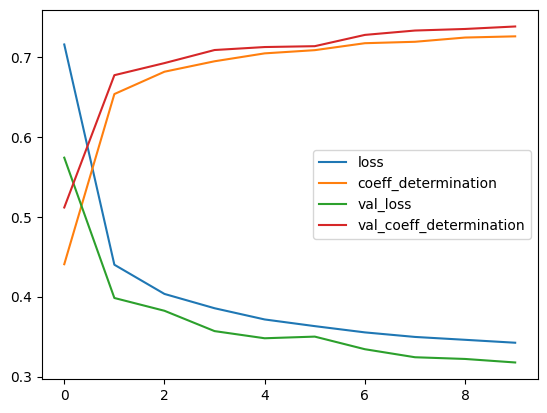

In [44]:
pd.DataFrame(history.history).plot()

In [45]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3363 - coeff_determination: 0.7240


[0.3362806737422943, 0.7240011692047119]

In [46]:
#single prediction

new = X_test[0]
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [47]:
new.shape

(8,)

In [48]:
new = new.reshape((1,8))

In [49]:
new.shape

(1, 8)

In [50]:
model.predict(new)

1/1 [==============================] - 0s 80ms/step


array([[0.8347232]], dtype=float32)